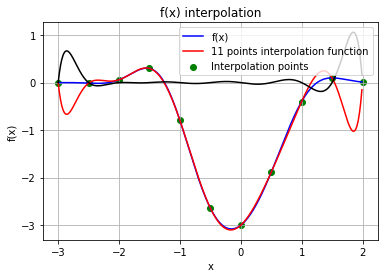

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math


def f(x):
  return math.exp(-x*x)*math.cos(x*x)*(x-3);

n = 11;
range_start = -3;
range_end = 2;

np.arange(range_start, range_end, 0.01)
x_range=np.array([-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2], dtype=float)
y_range = [f(x) for x in x_range]


def newton_interpolation_coefficients(range_x, range_y):
    a = [range_y]
    for i in range(len(range_x)):
        a.append([])
        for j in range(1, len(range_x) - i):
            a[i + 1].append((a[i][j] - a[i][j - 1]) / (
                    range_x[np.min([i + j, len(range_x) - 1])] - range_x[np.max([i + j - (i + 1), 0])]))
    return [_a[0] for _a in a[:-1]]

def newton_interpolation_f(range_x, range_y):
    a_coefficients = newton_interpolation_coefficients(range_x, range_y)
    def interpolation_f(_x):
        ff = a_coefficients[0]
        tmp = 1
        for ii in range(1, len(a_coefficients)):
            tmp *= (_x - range_x[ii - 1])
            ff += a_coefficients[ii] * tmp
        return ff
    return interpolation_f

interpol_f = newton_interpolation_f(x_range, y_range)

plt.plot(np.arange(range_start, range_end, 0.01), [f(x) for x in np.arange(range_start, range_end, 0.01)], 'b',
         label='f(x)')
plt.plot(np.arange(range_start, range_end, 0.01), [interpol_f(x) for x in np.arange(range_start, range_end, 0.01)], 'r', label=f'{n} points interpolation function')
plt.scatter(x_range, y_range, color='g', label='Interpolation points')


f = [f(x) for x in np.arange(range_start, range_end, 0.01)]
inter = [interpol_f(x) for x in np.arange(range_start, range_end, 0.01)]


ff = []
for i in range(len(f)):
  fff = f[i] - inter[i];
  ff.append(fff);


plt.plot(np.arange(range_start, range_end, 0.01),ff,'k-');



plt.title("f(x) interpolation")
plt.xlabel('x')
plt.ylabel('f(x)')
# plt.ylim(top=1.5, bottom=-3.5)
plt.grid(True)
plt.legend()
plt.show()


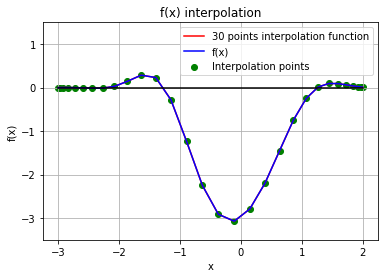

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

def f(x):
  return math.exp(-x*x)*math.cos(x*x)*(x-3);

n = 30
range_start = -3
range_end = 2


def chebyshev_range(count, start, end):
    range_x = []
    for i in range(count):
        temp = (end + start) / 2 + (end - start) / 2 * np.cos((2 * i + 1) * np.pi / (2 * count))
        range_x.append(temp)
    return range_x

x_range_cheb = chebyshev_range(n, range_start, range_end)
y_range_cheb = [f(x) for x in x_range_cheb]

def newton_interpolation_coefficients(range_x, range_y):
    a = [range_y]
    for i in range(len(range_x)):
        a.append([])
        for j in range(1, len(range_x) - i):
            a[i + 1].append((a[i][j] - a[i][j - 1]) / (
                    range_x[np.min([i + j, len(range_x) - 1])] - range_x[np.max([i + j - (i + 1), 0])]))
    return [_a[0] for _a in a[:-1]]

def newton_interpolation_f(range_x, range_y):
    a_coefficients = newton_interpolation_coefficients(range_x, range_y)
    def interpolation_f(_x):
        ff = a_coefficients[0]
        tmp = 1
        for ii in range(1, len(a_coefficients)):
            tmp *= (_x - range_x[ii - 1])
            ff += a_coefficients[ii] * tmp
        return ff
    return interpolation_f

interpol_f = newton_interpolation_f(x_range_cheb, y_range_cheb)


plt.plot(x_range_cheb, [interpol_f(x) for x in x_range_cheb], 'r', label=f'{n} points interpolation function')
plt.plot(x_range_cheb, [f(x) for x in x_range_cheb], 'b',
         label='f(x)')
plt.scatter(x_range_cheb, y_range_cheb, color='g', label='Interpolation points')
plt.title("f(x) interpolation")
plt.xlabel('x')
plt.ylabel('f(x)')

f = [f(x) for x in x_range_cheb]
inter = [interpol_f(x) for x in x_range_cheb]
ff = []
for i in range(len(x_range_cheb)):
  fff = f[i] - inter[i];
  ff.append(fff);


plt.plot(x_range_cheb,ff,'k-');

plt.ylim(top=1.5, bottom=-3.5)
plt.grid(True)
plt.legend()
plt.show()

[[ -6060.        ]
 [  4840.        ]
 [ 16676.66666667]
 [ -1696.66666667]
 [ -7308.33333333]
 [  4641.66666667]
 [  -901.66666667]
 [ -9886.66666667]
 [-13580.        ]
 [ 14151.66666667]
 [  6675.        ]
 [ -2230.        ]
 [    70.        ]
 [ -4955.        ]
 [  3115.        ]
 [  -891.66666667]
 [  -220.        ]
 [    91.66666667]
 [     0.        ]
 [     0.        ]]


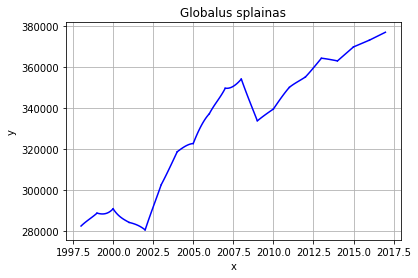

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import *
import sympy as sym


nP=20 # interpoliavimo tasku skaicius
nnn = 100

X = np.array([1998, 1999, 2000, 2001, 2002,
              2003, 2004, 2005, 2006, 2007,
              2008, 2009, 2010, 2011, 2012,
              2013, 2014, 2015, 2016, 2017])
Y = np.array([282380, 288710, 290820, 284140, 280480,
              302570, 318700, 322740, 337250, 349820,
              354270, 333820, 339610, 350250, 355300,
              364480, 363150, 370000, 373330, 377210])


# apskaiciuojamos antros isvestines splaino mazguose
 # ju parasoma: mazgu skaicius - 2 , nes nera sanduros pirmame ir paskutiniame taske
  # issprendus matricas, gaunamos antros lygciu isvestines

def splaino_koeficientai(X,Y,iopt):
  n=len(X);
  d=X[1:n]-X[0:(n-1)]
  A=np.zeros(shape=(n,n), dtype=float);
  b=np.zeros(shape=(n,1), dtype=float);
  for i in range(0, n-2):
      A[i,i]=d[i]/6;
      A[i,i+1] =(d[i]+d[i+1])/3
      A[i,i+2] = d[i+1]/6;
      # A[i,i:i+2]=[d[i]/6, (d[i]+d[i+1])/3, d[i+1]/6];
      b[i]=(Y[i+2]-Y[i+1])/d[i+1]-(Y[i+1]-Y[i])/d[i];
  if iopt == 0:  A[n-1,1]=1;A[n,n]=1;
  # print(b)
  DDF=A.dot(b);
  print(DDF)
  return DDF


DDF=splaino_koeficientai(X,Y,1)
#print(DDF)

 # splaino intervale tarp dvieju tasku apskaiciavimas
  # nnn - vaizdavio tzku skaicius
  # S - splaino reiksmes
  # sss - vaizdavimo abscises

def splainas(X,Y,DDF,nnn):
  d=X[1]-X[0];
  sss = np.arange(X[0], X[1], (X[1]-X[0])/(nnn-1))
  S=DDF[0]*(sss-X[0])**2/2-(DDF[0])*(sss-X[0])**3/(6*d)+DDF[1]*(sss-X[0])**3/(6*d)+(sss-X[0])*((Y[1]-Y[0])/d)-DDF[0]*d/3*(sss-X[0])-DDF[1]*d/6*(sss-X[0]) +Y[0];
  return S, sss

for iii in range(0,nP-1):
  S,sss=splainas(X[iii:iii+2],Y[iii:iii+2],DDF[iii:iii+2],nnn);
  # print(S)
  plt.plot(sss,S,'b');



# plt.plot(sss,S,'b', label='splainas');
# plt.plot(X,Y,'g', label='duomenys');
plt.title("Globalus splainas")
plt.xlabel('x')
plt.ylabel('y')
# plt.legend()
plt.grid();


[-1.06151152e+07  5.45317788e+03]


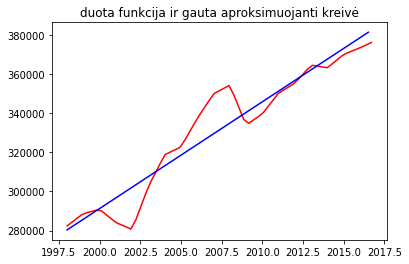

In [ ]:

  #  Aproksimuojama vienanariu bazeje. Duomenys imami is failo
  #  Parodoma, kokia yra aproksimuojancios funkcijos elgsena
  #  uz duomenu intervalo ribu

import matplotlib.pyplot as plt
import numpy as np
import math
import copy
from sympy import *
import sympy as sym
import scipy
from scipy.interpolate import interp1d




npower=6
n=2**npower-1;

SX = np.array([1998, 1999, 2000, 2001, 2002,
              2003, 2004, 2005, 2006, 2007,
              2008, 2009, 2010, 2011, 2012,
              2013, 2014, 2015, 2016, 2017])
SY = np.array([282380, 288710, 290820, 284140, 280480,
              302570, 318700, 322740, 337250, 349820,
              354270, 333820, 339610, 350250, 355300,
              364480, 363150, 370000, 373330, 377210])

ppp=0*60,   #% sukuriamas "atstumas" tarp signalu  %*******

a=min(SX);
b=max(SX);
t = np.arange(a, b, (b-a)/n);

fff = interp1d(SX, SY)(t)


plt.plot(t,fff,'r');
plt.title('duota funkcija ir gauta aproksimuojanti kreivė');

def function (m, x):
    G = np.zeros(shape=(len(x),m));
    for i in range(m):
        G[:,i]=x**(i);
    return G

# % Maziausiu kvadratu metodo lygciu sistema:
m = 2;
G=function(m,t)
Gg = copy.deepcopy(G)

# c=(np.transpose(Gg).dot(G))\(np.transpose(Gg).dot(np.transpose(fff)))

c=np.linalg.solve((Gg.T.conj().dot(G)),(Gg.T.conj().dot(fff.T.conj())))
print(c)

# sss=sprintf('%5.2g',c(1));
# for i=1:m-1
#     sss=[sss,sprintf('+%5.2gx^%1d',c(i+1),i)];
# end
# sss=strrep(sss,'+-','-');

# % Aproksimuojanti funkcija:
nnn=100; #%vaizdavimo tasku skaicius
tmin=min(t);
tmax=max(t);

ttt = np.arange(tmin, tmax, (tmax-tmin)/(nnn-1));

Gv=function(m,ttt);
fff1=np.matmul(Gv, c);
plt.plot(ttt,fff1,'b');


# legend({'duoti taskai',sprintf('f(x)=%s',sss)})
# title(sprintf('aproksimavimas maziausiu kvadratu metodu \n  tasku skaicius %d,  funkciju skaicius  %d',n,m));




